In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2, norm, cauchy
from iminuit import Minuit
from iminuit.cost import LeastSquares
# Cambiare directory per spostarsi nella cartella principale
import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

#importo libreria
import sys
sys.path.append('Config')
from lablib import *


In [61]:
#definisco le varie funzioni
def gauss(x, mu, sigma, a):
    return a * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def gauss_cost(x, mu, sigma, a, cost):
    return gauss(x, mu, sigma, a) + cost

def gauss_pol2(x, mu, sigma, a, b, c, cost):
    return gauss(x, mu, sigma, a) + b*x + c * x**2 + cost

def gauss_exp(x, mu, sigma, a, b):
    return gauss(x, mu, sigma, a) + b * np.exp(-x) 

def gauss_pol3 (x, mu, sigma, a, b, c, cost, d):
    return gauss_pol2(x, mu, sigma, a, b, c, cost) + d* x**3

# SODIO

Text(0.5, 1.0, 'Cristallo BGO')

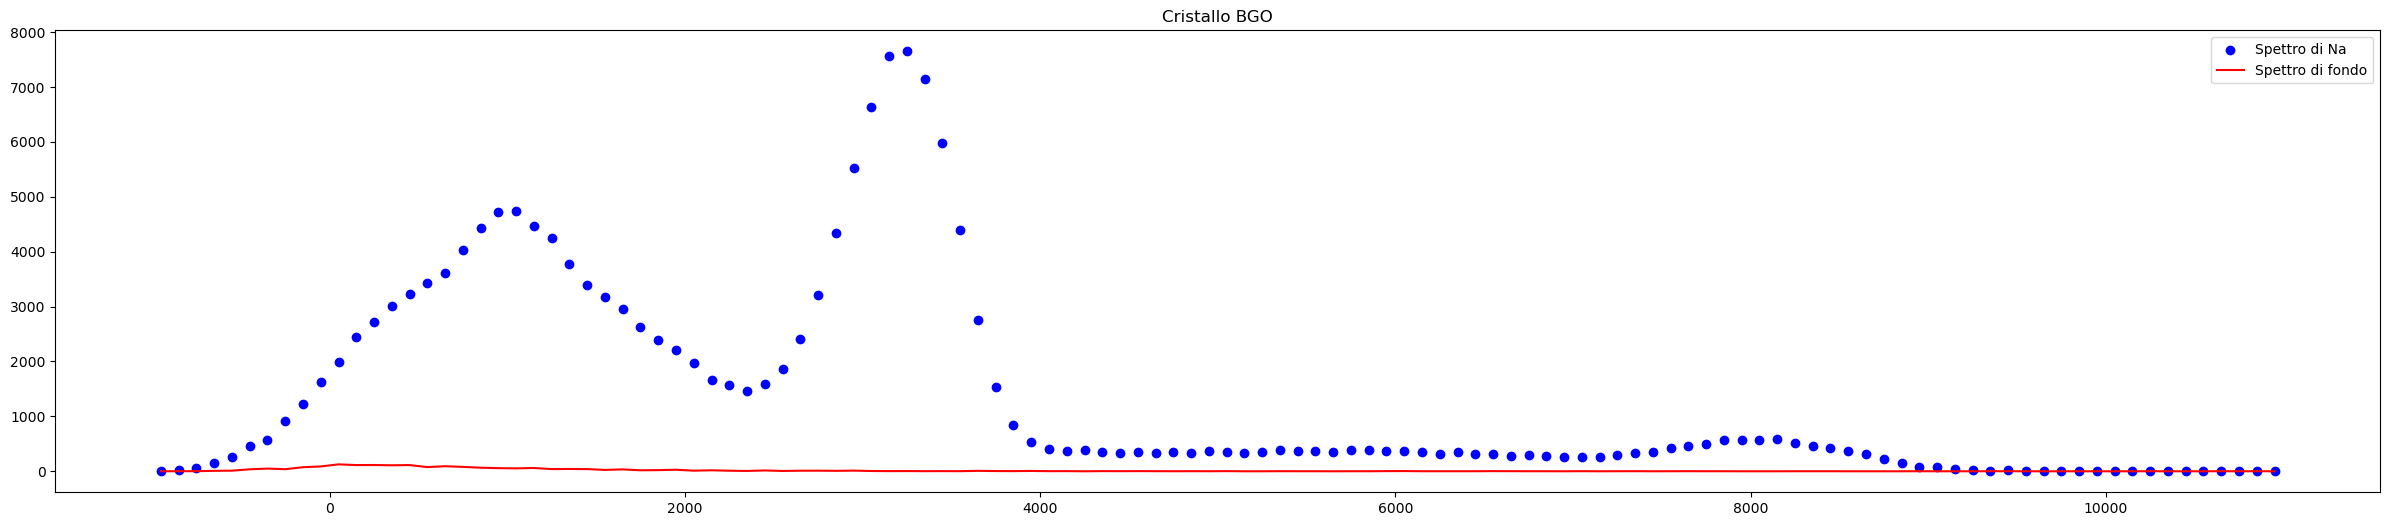

In [ ]:
#prendo i dati
df = pd.read_csv('Dati/Parte 2/BGO/Sodio_55.5V.txt', delim_whitespace= 'True', skiprows = 65, header=None, encoding= 'ISO-8859-1', names= ['ADC', 'Counts'])
df_bkg = pd.read_csv ('Dati/Parte 2/BGO/Bkg_55.5V.txt', delim_whitespace = 'True', header = None, skiprows = 65, encoding = 'ISO-8859-1', names = ['ADC', 'Counts'])
fig, ax = plt.subplots(figsize = (30,6))
plt.scatter(df['ADC'][:120], df['Counts'][:120], label = 'Spettro di Na', color = 'blue')
plt.plot(df_bkg['ADC'][:120], df_bkg['Counts'][:120], label = 'Spettro di fondo', color = 'red')
plt.legend()
plt.title('Cristallo BGO Sodio')

## Primo picco

In [23]:
start_index = 35
end_index = 51
df_primo_picco_sodio = df.iloc[start_index:end_index]
err_primo_picco_sodio = np.array(np.sqrt(df_primo_picco_sodio['Counts']))
#print(err_primo_picco_sodio)


In [24]:
LS_fit(df_primo_picco_sodio['ADC'], df_primo_picco_sodio['Counts'], err_primo_picco_sodio, gauss, mu = 3170, sigma = 350, a = 7400 )
# mu = 3212.3180344 +/- 1.6447200
# sigma = 301.6434072 +/- 0.7273093
# a = 7449.1536436 +/- 349.4674330

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 523 (χ²/ndof = 40.2)       │              Nfcn = 76               │
│ EDM = 2.44e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │ 3.1793e3  │ 0.0015e3  │            │            │         │         │       │
│ 1 │ sigma │   337.2   │    1.3    │            │            │         │         │       │
│ 2 │ a     │  7.55e3   │  0.04e3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │       mu    sigma        a │
├───────┼────────────────────────────┤
│    mu │     2.38     -0.7     11.1 │
│ sigma │     -0.7      1.8    -34.1 │
│     a │     11.1    -34.1 1.57e+03 │
└───────┴────────────────────────────┘

(('mu', 'sigma', 'a'),
 <ValueView mu=3179.306893746671 sigma=337.2397754390937 a=7551.432081851714>,
 <ErrorView mu=1.5431672400803904 sigma=1.3401664976636143 a=39.58330315029844>,
 0.0,
 13.0,
 522.988471237888,
 ┌───────┬────────────────────────────┐
│       │       mu    sigma        a │
├───────┼────────────────────────────┤
│    mu │     2.38     -0.7     11.1 │
│ sigma │     -0.7      1.8    -34.1 │
│     a │     11.1    -34.1 1.57e+03 │
└───────┴────────────────────────────┘)

## secondo picco

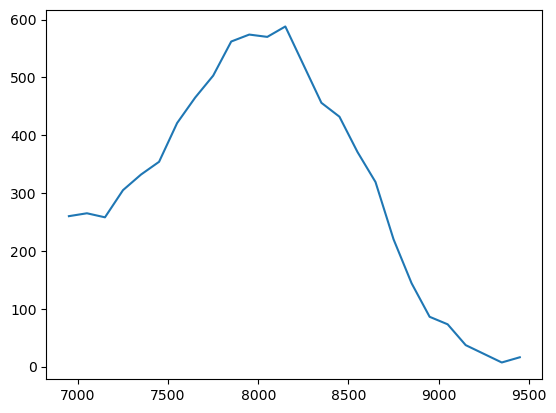

In [25]:
start_index = 79
end_index = 105
df_secondo_picco_sodio = df.iloc[start_index : end_index]
err_secondo_picco_sodio = np.array(np.sqrt(df_secondo_picco_sodio['Counts']))
plt.plot(df_secondo_picco_sodio['ADC'], df_secondo_picco_sodio['Counts'])
#print(df_secondo_picco_sodio)

In [26]:
LS_fit(df_secondo_picco_sodio['ADC'], df_secondo_picco_sodio['Counts'], err_secondo_picco_sodio, gauss, mu = 8000, sigma = 350, a = 500)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 223.2 (χ²/ndof = 9.7)      │              Nfcn = 101              │
│ EDM = 9.95e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  7.908e3  │  0.008e3  │            │            │         │         │       │
│ 1 │ sigma │    561    │     6     │            │            │         │         │       │
│ 2 │ a     │    587    │     8     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │    mu sigma     a │
├───────┼───────────────────┤
│    mu │  71.5   -30    20 │
│ sigma │   -30  36.5   -30 │
│     a │    20   -30  67.3 │
└───────┴───────────────────┘

(('mu', 'sigma', 'a'),
 <ValueView mu=7908.174067392591 sigma=561.2352317926578 a=586.7823394656486>,
 <ErrorView mu=8.455282523847933 sigma=6.0394205719577 a=8.206207044250672>,
 0.0,
 23.0,
 223.18457777499194,
 ┌───────┬───────────────────┐
│       │    mu sigma     a │
├───────┼───────────────────┤
│    mu │  71.5   -30    20 │
│ sigma │   -30  36.5   -30 │
│     a │    20   -30  67.3 │
└───────┴───────────────────┘)

# COBALTO

Text(0.5, 1.0, 'Cristallo BGO Cobalto')

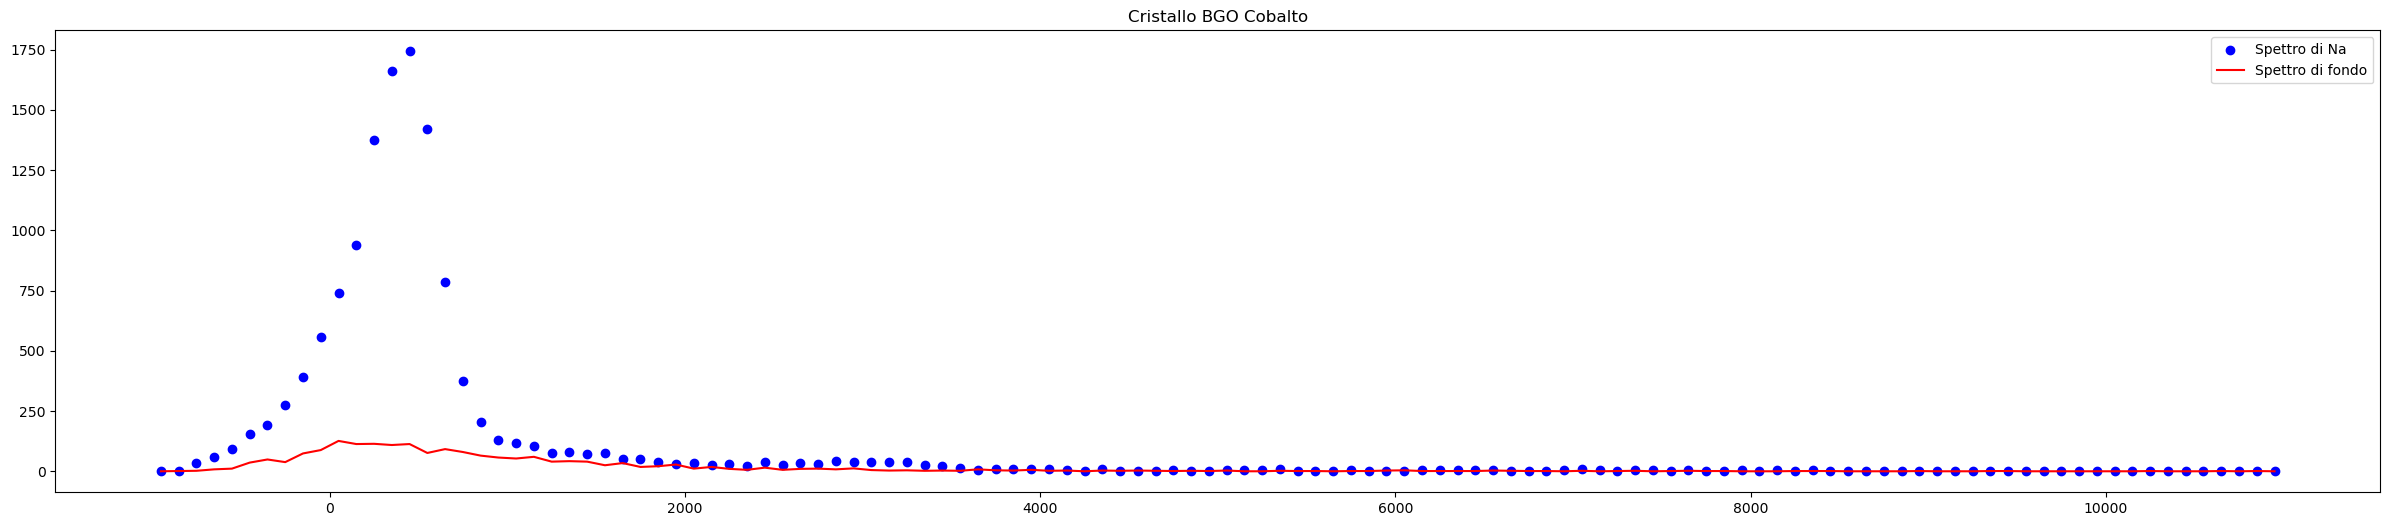

In [97]:
# prendo i dati
df = pd.read_csv('Dati/Parte 2/BGO/Cobalto_55.5V_bins100.txt', delim_whitespace= 'True', skiprows = 65, header=None, encoding= 'ISO-8859-1', names= ['ADC', 'Counts'])
df_bkg = pd.read_csv ('Dati/Parte 2/BGO/Bkg_55.5V.txt', delim_whitespace = 'True', header = None, skiprows = 65, encoding = 'ISO-8859-1', names = ['ADC', 'Counts'])
fig, ax = plt.subplots(figsize = (30,6))
plt.scatter(df['ADC'][:120], df['Counts'][:120], label = 'Spettro di Na', color = 'blue')
plt.plot(df_bkg['ADC'][:120], df_bkg['Counts'][:120], label = 'Spettro di fondo', color = 'red')
plt.legend()
plt.title('Cristallo BGO Cobalto')

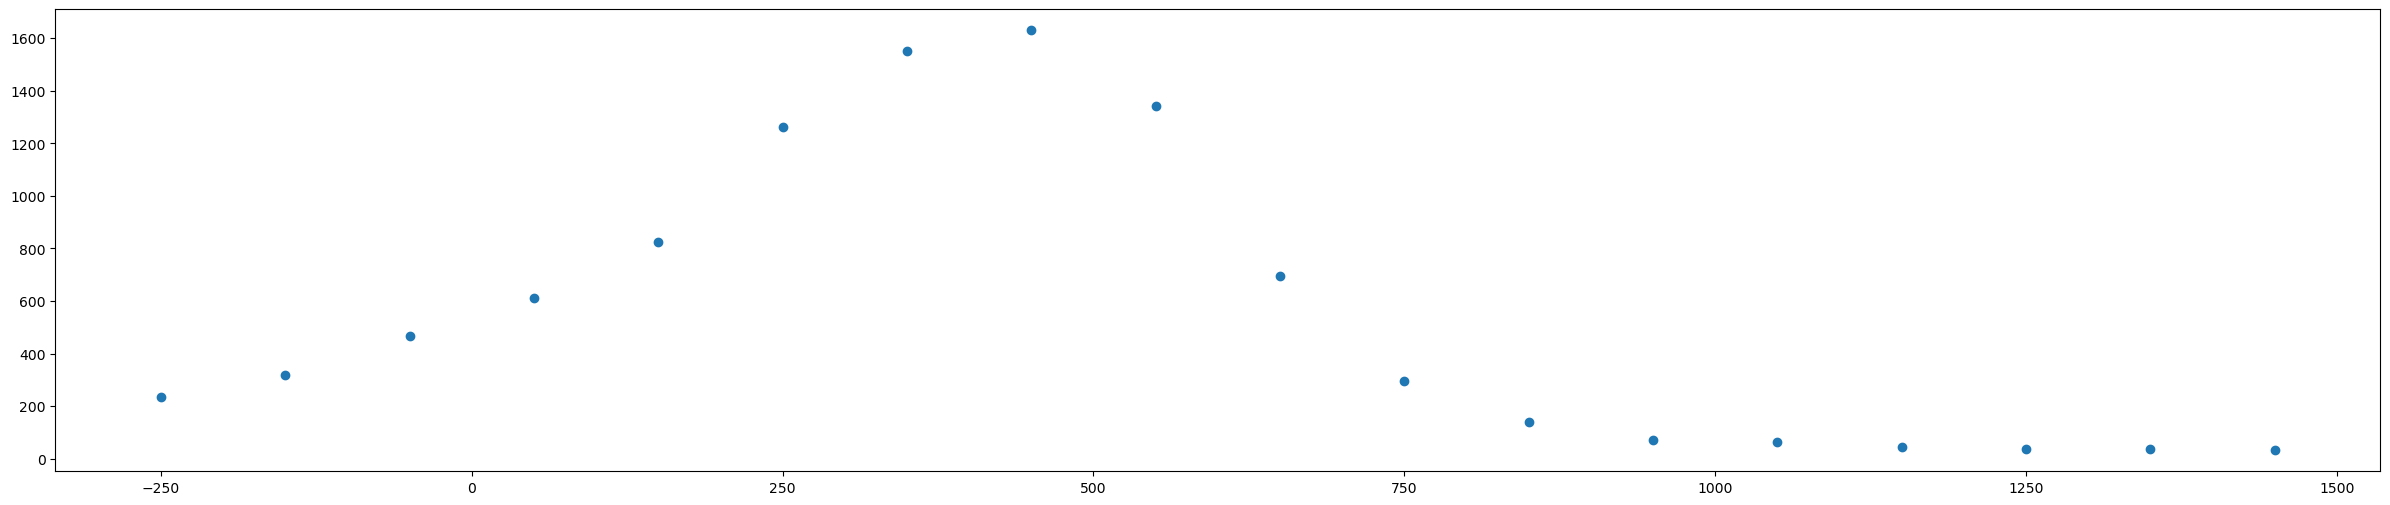

In [98]:
df_filtrato ['ADC'] = df['ADC'][:100] 
df_filtrato['Counts'] = df['Counts'][0:100] - df_bkg['Counts'][0:100]
#print(df_filtrato['Counts'][:])
fig, ax = plt.subplots(figsize = (30,6))
plt.scatter(df_filtrato['ADC'], df_filtrato['Counts'])
start_index = 9
end_index = 25
df_filtrato = df.iloc[start_index:end_index]
df_bkg = df_bkg[start_index:end_index]
err_df_filtrato = np.array(np.sqrt(df_filtrato['Counts']) + np.sqrt(df_bkg['Counts']))


In [101]:
LS_fit(df_filtrato['ADC'], df_filtrato['Counts'], err_df_filtrato, gauss_cost, mu = 500, sigma = 250, a  = 1000, cost = 70)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 93.85 (χ²/ndof = 7.8)      │              Nfcn = 132              │
│ EDM = 2.06e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    367    │     4     │            │            │         │         │       │
│ 1 │ sigma │    224    │     4     │            │            │         │         │       │
│ 2 │ a     │  1.618e3  │  0.030e3  │            │            │         │         │       │
│ 3 │ cost  │    82     │     7     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────┐
│       │    mu sigma     a  cost │
├───────┼─────────────────────────┤
│    mu │  16.4    -5    24     1 │
│ sigma │    -5    17   -65   -13 │
│     a │    24   -65   909   -20 │
│  cost │     1   -13   -20  51.1 │
└───────┴─────────────────────────┘

(('mu', 'sigma', 'a', 'cost'),
 <ValueView mu=367.32511524045947 sigma=224.22826737202482 a=1617.5026968125587 cost=82.17710871907299>,
 <ErrorView mu=4.050800545645023 sigma=4.119913216821001 a=30.14289052875353 cost=7.145144190071881>,
 8.770761894538737e-15,
 12.0,
 93.85419827249191,
 ┌───────┬─────────────────────────┐
│       │    mu sigma     a  cost │
├───────┼─────────────────────────┤
│    mu │  16.4    -5    24     1 │
│ sigma │    -5    17   -65   -13 │
│     a │    24   -65   909   -20 │
│  cost │     1   -13   -20  51.1 │
└───────┴─────────────────────────┘)